In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path 

In [2]:
fig_dir = Path('/home/jovyan/Figures/ECCO_GMSL/')
data_dir = Path('/home/jovyan/Data/ECCO_GMSL/GMSL/')

# Load GMSL data

In [3]:
#GMSL from ECCO along track data
alongtrack_gmsl = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_alongtrack_19922017_noerror_simpleweight_nomean.nc')
alongtrack_gmsl_randomnoise = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_alongtrack_19922017_randomnoise_simpleweight_nomean.nc')
alongtrack_gmsl_missingdata = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_alongtrack_19922017_missingdata_simpleweight_nomean.nc')
alongtrack_gmsl_orbiterror = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_alongtrack_19922017_orbiterror_simpleweight_nomean.nc')
alongtrack_gmsl_3errors = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_alongtrack_19922017_3errors_simpleweight_nomean.nc')

#GMSL from synthetic grids
gmsl_grids = xr.open_dataset(str(data_dir) + '/GMSL_grids_19922017_noerror_100points.nc')
gmsl_grids_randomnoise = xr.open_dataset(str(data_dir) + '/GMSL_grids_19922017_randomnoise_100points.nc')
gmsl_grids_missingdata = xr.open_dataset(str(data_dir) + '/GMSL_grids_19922017_missingdata_100points.nc')
gmsl_grids_orbiterror = xr.open_dataset(str(data_dir) + '/GMSL_grids_19922017_orbiterror_100points.nc')
gmsl_grids_3errors = xr.open_dataset(str(data_dir) + '/GMSL_grids_19922017_3errors_100points.nc')

# GMSL from ECCO daily outputs
ECCO_global_mean_sea_level = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_dailyfiles_19922017.nc')

# GMSL Beckley
gmsl_beckley = xr.open_dataset(str(data_dir) + '/GMSL_Beckley_v51.nc')
gmsl_beckley_alongtrack = xr.open_dataset(str(data_dir) + '/GMSL_Beckley.nc')

# GMSL from along track Beckley

In [4]:
gmsl_beckley_alongtrack.gmsl_beckley_alongtrack

<xarray.DataArray 'gmsl_beckley_alongtrack' (time: 1058)>
array([0.01726 , 0.012426, 0.004764, ..., 0.063102, 0.06    , 0.063333])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-05 1993-01-15 ... 2021-09-25
Attributes:
    units:    m
    summary:  10-day GMSL time series computed on the alongtrack GSFC data

In [5]:
alongtrack_gmsl_missingdata

<xarray.Dataset>
Dimensions:               (time: 924)
Coordinates:
  * time                  (time) datetime64[ns] 1992-09-27 ... 2018-01-04
    cycle                 (time) int64 ...
Data variables:
    gmsl_ecco_alongtrack  (time) float32 ...

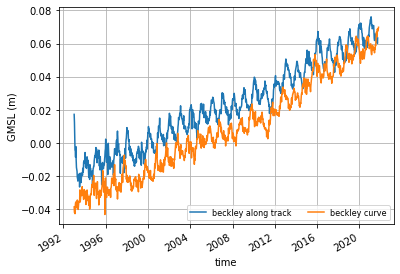

In [6]:
(gmsl_beckley_alongtrack.gmsl_beckley_alongtrack).plot(label='beckley along track');
(gmsl_beckley.gmsl).plot(label='beckley curve');
plt.grid()
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)

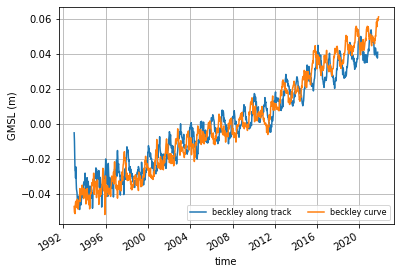

In [7]:
(gmsl_beckley_alongtrack.gmsl_beckley_alongtrack-(gmsl_beckley_alongtrack.gmsl_beckley_alongtrack).mean()).plot(label='beckley along track');
(gmsl_beckley.gmsl-(gmsl_beckley.gmsl).mean()).plot(label='beckley curve');
plt.grid()
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)

# GMSL from along track ECCO data (no error, random noise, orbit error, missing data, 3 errors)

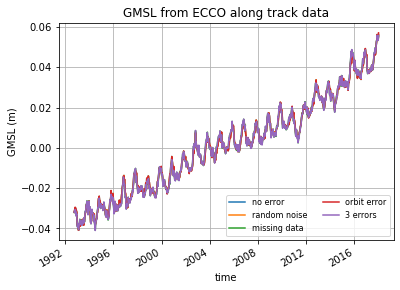

In [8]:
# (gmsl_beckley_alongtrack.gmsl_beckley_alongtrack).plot(label='beckley along track');
# (gmsl_beckley.gmsl).plot(label='beckley curve');
alongtrack_gmsl.gmsl_ecco_alongtrack.plot(label='no error');
alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack.plot(label='random noise');
alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack.plot(label='missing data');
alongtrack_gmsl_orbiterror.gmsl_ecco_alongtrack.plot(label='orbit error');
alongtrack_gmsl_3errors.gmsl_ecco_alongtrack.plot(label='3 errors');
plt.grid()
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.title('GMSL from ECCO along track data')
plt.savefig(fig_dir / 'GMSL_ecco_alongtrack.png',dpi=200,transparent=False,facecolor='white')

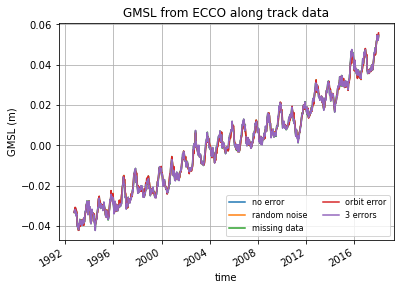

In [9]:
(alongtrack_gmsl.gmsl_ecco_alongtrack-alongtrack_gmsl.gmsl_ecco_alongtrack.mean()).plot(label='no error');
(alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack-alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack.mean()).plot(label='random noise');
(alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack-alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack.mean()).plot(label='missing data');
(alongtrack_gmsl_orbiterror.gmsl_ecco_alongtrack-alongtrack_gmsl_orbiterror.gmsl_ecco_alongtrack.mean()).plot(label='orbit error');
(alongtrack_gmsl_3errors.gmsl_ecco_alongtrack-alongtrack_gmsl_3errors.gmsl_ecco_alongtrack.mean()).plot(label='3 errors');
# (gmsl_beckley.gmsl-(gmsl_beckley.gmsl).mean()).plot(label='beckley curve');
plt.grid()
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.title('GMSL from ECCO along track data')
plt.savefig(fig_dir / 'GMSL_ecco_alongtrack_refmean.png',dpi=200,transparent=False,facecolor='white')

# GMSL time series from grids

In [10]:
gmsl_grids

<xarray.Dataset>
Dimensions:     (time: 924)
Coordinates:
  * time        (time) datetime64[ns] 1992-09-27 1992-10-07 ... 2018-01-04
Data variables:
    gmsl_grids  (time) float32 ...

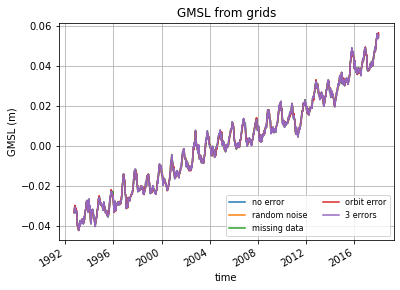

In [11]:
gmsl_grids.gmsl_grids.plot(label='no error');
gmsl_grids_randomnoise.gmsl_grids.plot(label='random noise');
gmsl_grids_missingdata.gmsl_grids.plot(label='missing data');
gmsl_grids_orbiterror.gmsl_grids.plot(label='orbit error');
gmsl_grids_3errors.gmsl_grids.plot(label='3 errors');
plt.grid()
plt.title('GMSL from grids')
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_grids.png',dpi=200,transparent=False,facecolor='white')

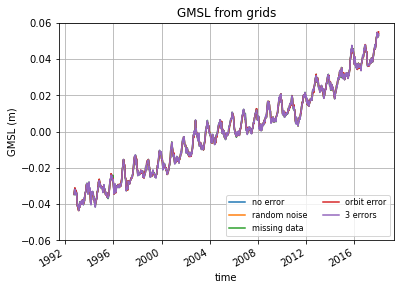

In [12]:
(gmsl_grids.gmsl_grids-gmsl_grids.gmsl_grids.mean()).plot(label='no error');
(gmsl_grids_randomnoise.gmsl_grids-gmsl_grids_randomnoise.gmsl_grids.mean()).plot(label='random noise');
(gmsl_grids_missingdata.gmsl_grids-gmsl_grids_missingdata.gmsl_grids.mean()).plot(label='missing data');
(gmsl_grids_orbiterror.gmsl_grids-gmsl_grids_orbiterror.gmsl_grids.mean()).plot(label='orbit error');
(gmsl_grids_3errors.gmsl_grids-gmsl_grids_3errors.gmsl_grids.mean()).plot(label='3 errors');
# (gmsl_beckley_alongtrack.gmsl_beckley_alongtrack-gmsl_beckley_alongtrack.gmsl_beckley_alongtrack.mean()).plot(label='beckley along track');
plt.grid()
plt.title('GMSL from grids')
plt.ylabel('GMSL (m)')
plt.ylim([-0.06,0.06])
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_grids_refmean.png',dpi=200,transparent=False,facecolor='white')

# GMSL from daily ECCO output

In [13]:
ECCO_global_mean_sea_level

<xarray.Dataset>
Dimensions:    (time: 924)
Coordinates:
  * time       (time) datetime64[ns] 1992-09-27 1992-10-07 ... 2018-01-04
Data variables:
    gmsl_ecco  (time) float64 ...

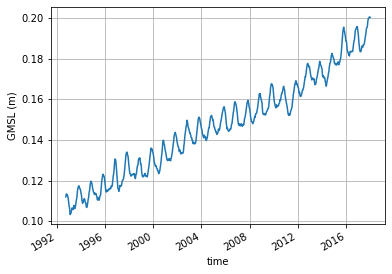

In [14]:
ECCO_global_mean_sea_level.gmsl_ecco.plot();
plt.grid()
plt.title('')
plt.ylabel('GMSL (m)')
plt.savefig(fig_dir / 'GMSL_ecco_daily.png',dpi=200,transparent=False,facecolor='white')

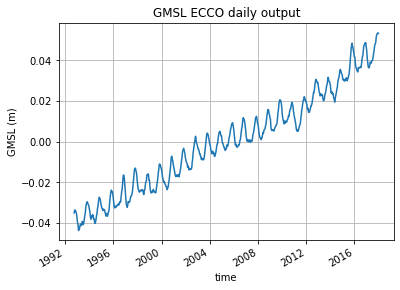

In [15]:
(ECCO_global_mean_sea_level.gmsl_ecco-ECCO_global_mean_sea_level.gmsl_ecco.mean()).plot();
plt.grid()
plt.title('GMSL ECCO daily output')
plt.ylabel('GMSL (m)')
plt.savefig(fig_dir / 'GMSL_ecco_daily_refmean.png',dpi=200,transparent=False,facecolor='white')

# Comparisons

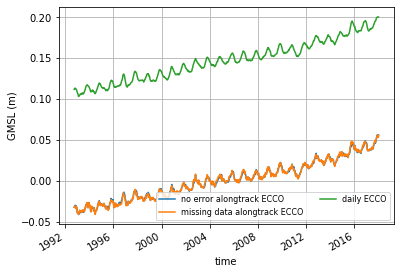

In [16]:
fig=plt.figure()
alongtrack_gmsl.gmsl_ecco_alongtrack.plot(label='no error alongtrack ECCO');
alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack.plot(label='missing data alongtrack ECCO');
ECCO_global_mean_sea_level.gmsl_ecco.plot(label='daily ECCO')
plt.grid()
plt.title('')
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)

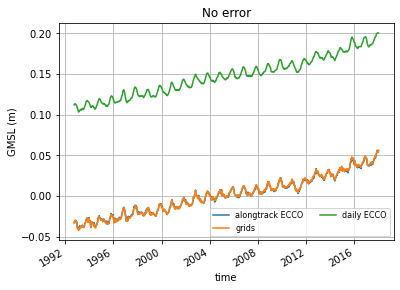

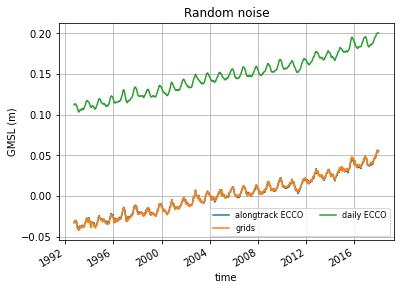

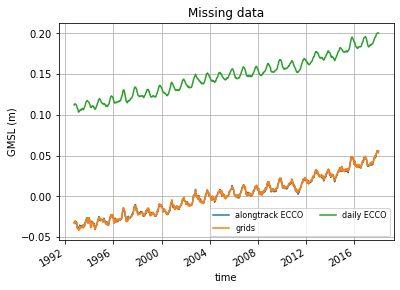

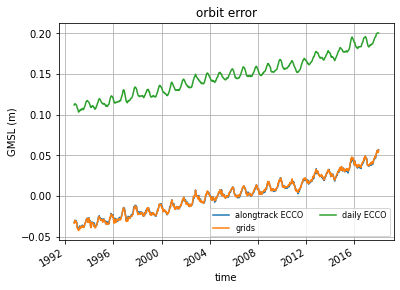

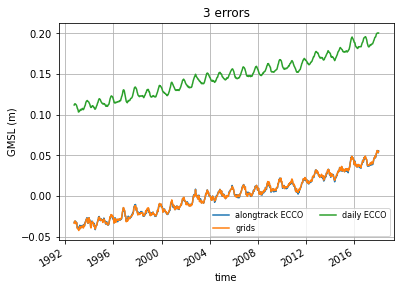

In [17]:
fig=plt.figure()
alongtrack_gmsl.gmsl_ecco_alongtrack.plot(label='alongtrack ECCO');
gmsl_grids.gmsl_grids.plot(label='grids');
ECCO_global_mean_sea_level.gmsl_ecco.plot(label='daily ECCO')
plt.grid()
plt.title('No error')
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_ecco_alongtrack_grids_daily_noerror.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack.plot(label='alongtrack ECCO');
gmsl_grids_randomnoise.gmsl_grids.plot(label='grids');
ECCO_global_mean_sea_level.gmsl_ecco.plot(label='daily ECCO')
plt.grid()
plt.title('Random noise')
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_ecco_alongtrack_grids_daily_randomnoise.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack.plot(label='alongtrack ECCO');
gmsl_grids_missingdata.gmsl_grids.plot(label='grids');
ECCO_global_mean_sea_level.gmsl_ecco.plot(label='daily ECCO')
plt.grid()
plt.title('Missing data')
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_ecco_alongtrack_grids_daily_missingdata.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
alongtrack_gmsl_orbiterror.gmsl_ecco_alongtrack.plot(label='alongtrack ECCO');
gmsl_grids_orbiterror.gmsl_grids.plot(label='grids');
ECCO_global_mean_sea_level.gmsl_ecco.plot(label='daily ECCO')
plt.grid()
plt.title('orbit error')
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_ecco_alongtrack_grids_daily_orbiterror.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
alongtrack_gmsl_3errors.gmsl_ecco_alongtrack.plot(label='alongtrack ECCO');
gmsl_grids_3errors.gmsl_grids.plot(label='grids');
ECCO_global_mean_sea_level.gmsl_ecco.plot(label='daily ECCO')
plt.grid()
plt.title('3 errors')
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_ecco_alongtrack_grids_daily_3errors.png',dpi=200,transparent=False,facecolor='white')

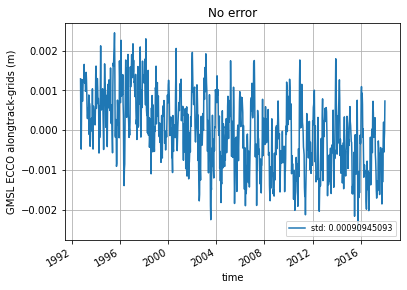

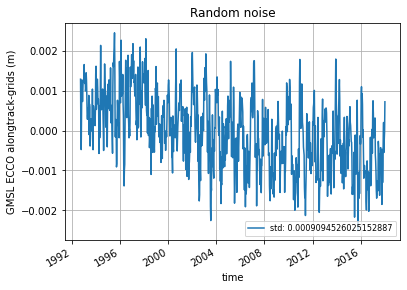

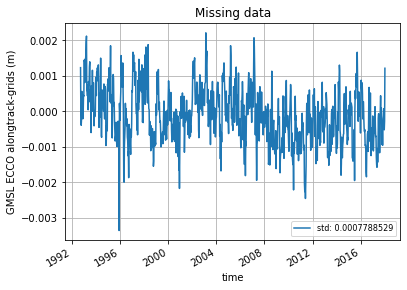

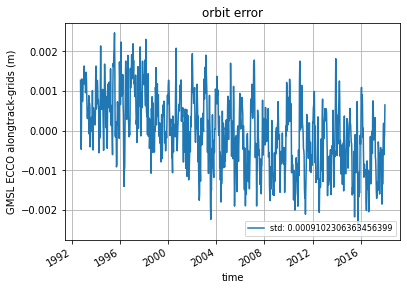

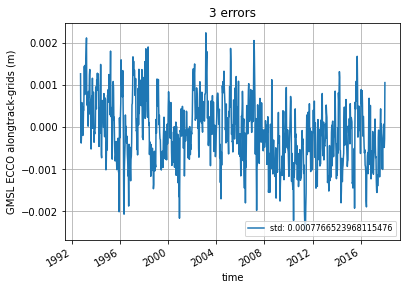

In [34]:
fig=plt.figure()
(alongtrack_gmsl.gmsl_ecco_alongtrack-gmsl_grids.gmsl_grids).plot(label='std: '+str((alongtrack_gmsl.gmsl_ecco_alongtrack-gmsl_grids.gmsl_grids).std(dim='time',skipna=True).values));
plt.grid()
plt.title('No error')
plt.ylabel('GMSL ECCO alongtrack-grids (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_diff_ecco_alongtrack_grids_noerror.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
(alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack-gmsl_grids_randomnoise.gmsl_grids).plot(label='std: '+str((alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack-gmsl_grids_randomnoise.gmsl_grids).std(dim='time',skipna=True).values));
plt.grid()
plt.title('Random noise')
plt.ylabel('GMSL ECCO alongtrack-grids (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_diff_ecco_alongtrack_grids_randomnoise.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
(alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack-gmsl_grids_missingdata.gmsl_grids).plot(label='std: '+str((alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack-gmsl_grids_missingdata.gmsl_grids).std(dim='time',skipna=True).values));
plt.grid()
plt.title('Missing data')
plt.ylabel('GMSL ECCO alongtrack-grids (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_diff_ecco_alongtrack_grids_missingdata.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
(alongtrack_gmsl_orbiterror.gmsl_ecco_alongtrack-gmsl_grids_orbiterror.gmsl_grids).plot(label='std: '+str((alongtrack_gmsl_orbiterror.gmsl_ecco_alongtrack-gmsl_grids_orbiterror.gmsl_grids).std(dim='time',skipna=True).values));
plt.grid()
plt.title('orbit error')
plt.ylabel('GMSL ECCO alongtrack-grids (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_diff_ecco_alongtrack_grids_orbiterror.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
(alongtrack_gmsl_3errors.gmsl_ecco_alongtrack-gmsl_grids_3errors.gmsl_grids).plot(label='std: '+str((alongtrack_gmsl_3errors.gmsl_ecco_alongtrack-gmsl_grids_3errors.gmsl_grids).std(dim='time',skipna=True).values));
plt.grid()
plt.title('3 errors')
plt.ylabel('GMSL ECCO alongtrack-grids (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_diff_ecco_alongtrack_grids_3errors.png',dpi=200,transparent=False,facecolor='white')

In [20]:
ECCO_global_mean_sea_level

<xarray.Dataset>
Dimensions:    (time: 924)
Coordinates:
  * time       (time) datetime64[ns] 1992-09-27 1992-10-07 ... 2018-01-04
Data variables:
    gmsl_ecco  (time) float64 0.112 0.1129 0.1134 0.113 ... 0.2005 0.2004 0.2003

In [21]:
alongtrack_gmsl

<xarray.Dataset>
Dimensions:               (time: 924)
Coordinates:
  * time                  (time) datetime64[ns] 1992-09-27 ... 2018-01-04
    cycle                 (time) int64 ...
Data variables:
    gmsl_ecco_alongtrack  (time) float32 -0.03183 -0.03151 ... 0.05397 0.05622

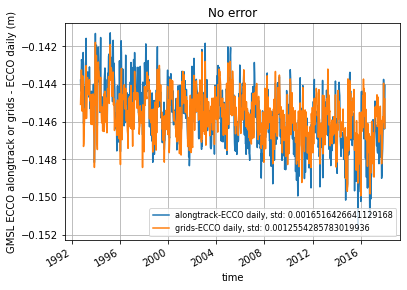

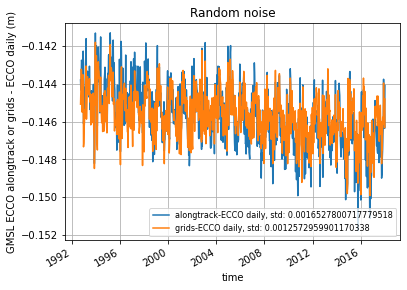

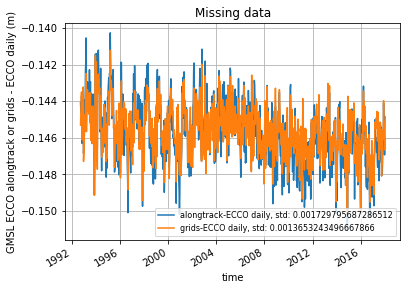

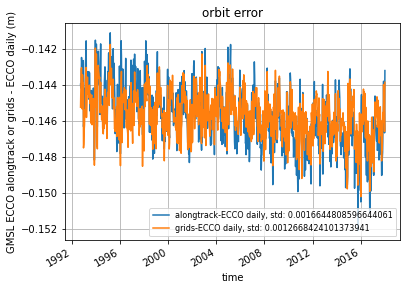

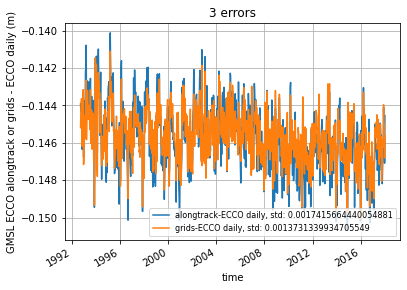

In [37]:
fig=plt.figure()
(alongtrack_gmsl.gmsl_ecco_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='alongtrack-ECCO daily, std: '+str((alongtrack_gmsl.gmsl_ecco_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).std(dim='time',skipna=True).values));
(gmsl_grids.gmsl_grids-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='grids-ECCO daily, std: '+str((gmsl_grids.gmsl_grids-ECCO_global_mean_sea_level.gmsl_ecco).std(dim='time',skipna=True).values));
plt.grid()
plt.title('No error')
plt.ylabel('GMSL ECCO alongtrack or grids - ECCO daily (m)')
plt.legend(ncol=1, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_diff_daily_ecco_alongtrack_grids_noerror.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
(alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='alongtrack-ECCO daily, std: '+str((alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).std(dim='time',skipna=True).values));
(gmsl_grids_randomnoise.gmsl_grids-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='grids-ECCO daily, std: '+str((gmsl_grids_randomnoise.gmsl_grids-ECCO_global_mean_sea_level.gmsl_ecco).std(dim='time',skipna=True).values));
plt.grid()
plt.title('Random noise')
plt.ylabel('GMSL ECCO alongtrack or grids - ECCO daily (m)')
plt.legend(ncol=1, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_diff_daily_ecco_alongtrack_grids_randomnoise.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
(alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='alongtrack-ECCO daily, std: '+str((alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).std(dim='time',skipna=True).values));
(gmsl_grids_missingdata.gmsl_grids-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='grids-ECCO daily, std: '+str((gmsl_grids_missingdata.gmsl_grids-ECCO_global_mean_sea_level.gmsl_ecco).std(dim='time',skipna=True).values));
# (gmsl_beckley_alongtrack.gmsl_beckley_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='beckley alongtrack-ECCO daily');
plt.grid()
plt.title('Missing data')
plt.ylabel('GMSL ECCO alongtrack or grids - ECCO daily (m)')
plt.legend(ncol=1, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_diff_daily_ecco_alongtrack_grids_missingdata.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
(alongtrack_gmsl_orbiterror.gmsl_ecco_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='alongtrack-ECCO daily, std: '+str((alongtrack_gmsl_orbiterror.gmsl_ecco_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).std(dim='time',skipna=True).values));
(gmsl_grids_orbiterror.gmsl_grids-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='grids-ECCO daily, std: '+str((gmsl_grids_orbiterror.gmsl_grids-ECCO_global_mean_sea_level.gmsl_ecco).std(dim='time',skipna=True).values));
plt.grid()
plt.title('orbit error')
plt.ylabel('GMSL ECCO alongtrack or grids - ECCO daily (m)')
plt.legend(ncol=1, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_diff_daily_ecco_alongtrack_grids_orbiterror.png',dpi=200,transparent=False,facecolor='white')

fig=plt.figure()
(alongtrack_gmsl_3errors.gmsl_ecco_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='alongtrack-ECCO daily, std: '+str((alongtrack_gmsl_3errors.gmsl_ecco_alongtrack-ECCO_global_mean_sea_level.gmsl_ecco).std(dim='time',skipna=True).values));
(gmsl_grids_3errors.gmsl_grids-ECCO_global_mean_sea_level.gmsl_ecco).plot(label='grids-ECCO daily, std: '+str((gmsl_grids_3errors.gmsl_grids-ECCO_global_mean_sea_level.gmsl_ecco).std(dim='time',skipna=True).values));
plt.grid()
plt.title('3 errors')
plt.ylabel('GMSL ECCO alongtrack or grids - ECCO daily (m)')
plt.legend(ncol=1, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_diff_daily_ecco_alongtrack_grids_3errors.png',dpi=200,transparent=False,facecolor='white')

# GMSL from Beckley time series

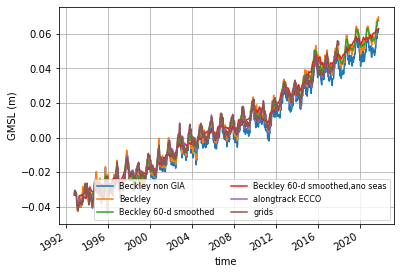

In [23]:
gmsl_beckley.gmsl_nongia.plot(label='Beckley non GIA');
gmsl_beckley.gmsl.plot(label='Beckley');
gmsl_beckley.gmsl_smoothed.plot(label='Beckley 60-d smoothed');
gmsl_beckley.gmsl_smoothed_anoseas.plot(label='Beckley 60-d smoothed,ano seas');
alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack.plot(label='alongtrack ECCO');
gmsl_grids_missingdata.gmsl_grids.plot(label='grids');
plt.grid()
plt.title('')
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_beckley.png',dpi=200,transparent=False,facecolor='white')

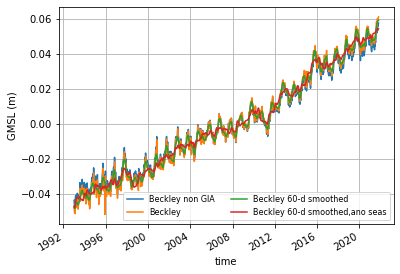

In [24]:
(gmsl_beckley.gmsl_nongia-gmsl_beckley.gmsl_nongia.mean()).plot(label='Beckley non GIA');
(gmsl_beckley.gmsl-gmsl_beckley.gmsl.mean()).plot(label='Beckley');
(gmsl_beckley.gmsl_smoothed-gmsl_beckley.gmsl_smoothed.mean()).plot(label='Beckley 60-d smoothed');
(gmsl_beckley.gmsl_smoothed_anoseas-gmsl_beckley.gmsl_smoothed_anoseas.mean()).plot(label='Beckley 60-d smoothed,ano seas');
plt.grid()
plt.title('')
plt.ylabel('GMSL (m)')
plt.legend(ncol=2, loc='lower right',fontsize=8)
plt.savefig(fig_dir / 'GMSL_beckley_refmean.png',dpi=200,transparent=False,facecolor='white')